# Analyse des ventes ds produits Apple en 2024
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('apple_sales_2024.csv')

In [2]:
# Visualiser les données
data.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


In [3]:
# La composition du dataset en colonnes et lignes
data.shape

(1000, 7)

In [4]:
# Voir les informations sur les types de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [5]:
# voir la presence des données nulles 
data.isnull().sum()

State                              0
Region                             0
iPhone Sales (in million units)    0
iPad Sales (in million units)      0
Mac Sales (in million units)       0
Wearables (in million units)       0
Services Revenue (in billion $)    0
dtype: int64

In [6]:
# l'ensemble des régions existantes
data['Region'].unique()

array(['Greater China', 'Europe', 'Rest of Asia', 'North America',
       'Rest of World'], dtype=object)

In [7]:
# Renommer certains colonnes pour faciliter la manipulation
data.rename(columns={
    'iPhone Sales (in million units)': 'iPhone_Sales',
    'iPad Sales (in million units)' : 'iPad_Sales',
    'Mac Sales (in million units)' : 'Mac_Sales',
    'Wearables (in million units)': 'Wearables',
    'Services Revenue (in billion $)': 'Revenue_$'}, inplace = True)

In [8]:
data

,State,Region,iPhone_Sales,iPad_Sales,Mac_Sales,Wearables,Revenue_$
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29
...,...,...,...,...,...,...,...
995,Mexico,Rest of World,29.86,10.30,7.40,9.60,18.56
996,Texas,North America,27.83,12.52,8.89,4.46,6.38
997,Germany,Europe,25.47,7.69,7.90,6.90,15.00
998,Shenzhen,Greater China,15.34,8.81,8.24,8.78,15.49


In [9]:
# Ajouter un id pour chaque region
region = data['Region'].unique()
id_region = dict(zip(region, range(1, len(region) + 1)))
data['ID_Region'] = data['Region'].map(id_region)

In [10]:
data

,State,Region,iPhone_Sales,iPad_Sales,Mac_Sales,Wearables,Revenue_$,ID_Region
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88,1
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12,2
2,UK,Europe,5.61,14.09,8.78,8.19,19.85,2
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16,1
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29,3
...,...,...,...,...,...,...,...,...
995,Mexico,Rest of World,29.86,10.30,7.40,9.60,18.56,5
996,Texas,North America,27.83,12.52,8.89,4.46,6.38,4
997,Germany,Europe,25.47,7.69,7.90,6.90,15.00,2
998,Shenzhen,Greater China,15.34,8.81,8.24,8.78,15.49,1


# Analyse exploratoire des données

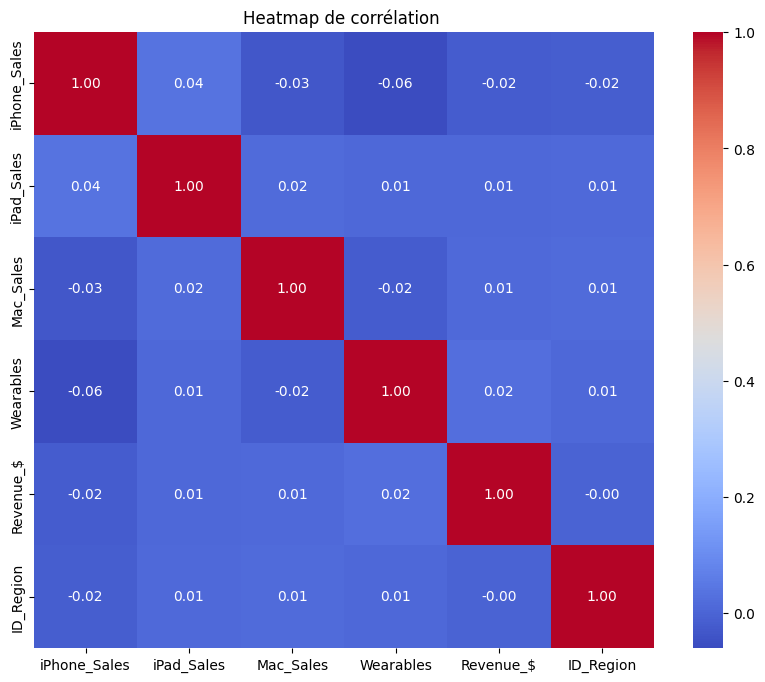

In [11]:
# Voir la corrélation existante en les variables numériques
numeric_data = data.select_dtypes(include=['number'])
matrix_data = numeric_data.corr()

# création du Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(matrix_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de corrélation ")
plt.show()

# Interprétation de la Heatmap :
#### Dans l’ensemble, les corrélations entre les variables sont très faibles, allant de 0.04 à -0.06. Cela suggère qu'il n'existe pas de relation linéaire significative entre les variables.

### Cette observation peut indiquer l’une des deux possibilités suivantes :
#### Absence de relation : Les variables ne sont pas liées de manière claire ou prévisible.
#### Manque d'informations dans les données actuelles : Il est possible que les données disponibles ne contiennent pas suffisamment de caractéristiques ou de facteurs expliquant une relation (par exemple, d'autres variables importantes n'ont pas été incluses dans le dataset).

In [12]:
regiongroup = data.groupby('Region')[['iPhone_Sales','iPad_Sales','Mac_Sales','Wearables','Revenue_$']].sum()

In [13]:
regiongroup

,iPhone_Sales,iPad_Sales,Mac_Sales,Wearables,Revenue_$
Region,,,,,
Europe,3563.12,1745.66,1111.22,1353.12,2416.30
Greater China,3868.28,1862.95,1212.80,1514.86,2780.72
North America,3124.14,1625.44,1028.96,1272.92,2281.21
Rest of Asia,3091.50,1473.26,982.94,1296.29,2267.15
Rest of World,3797.46,1858.57,1219.84,1498.31,2701.75


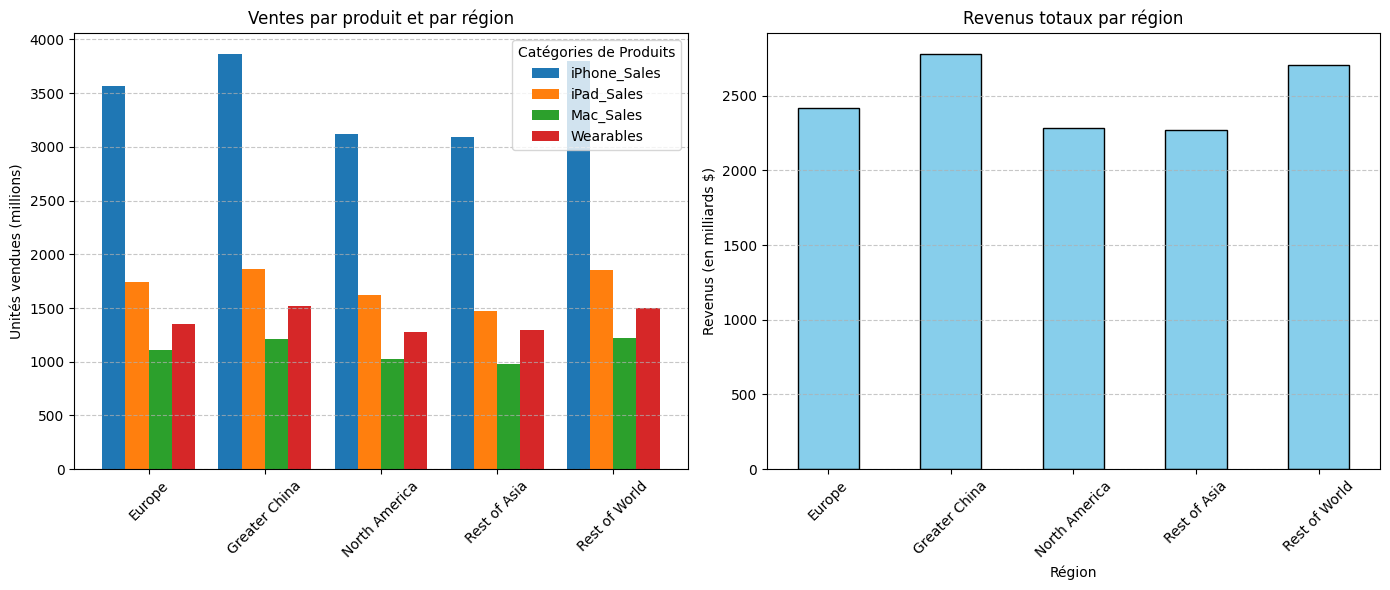

In [14]:
# Configuration de la figure
plt.figure(figsize=(14, 6))  # Taille globale de la figure (largeur, hauteur)

# Premier graphique : Barres pour les catégories par région
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
categories = ['iPhone_Sales', 'iPad_Sales', 'Mac_Sales', 'Wearables']
regions = regiongroup.index  # Récupération des régions (index après groupby)
x = range(len(regions))  # Positions des groupes de barres
width = 0.2  # Largeur des barres

for i, category in enumerate(categories):
    plt.bar(
        [p + i * width for p in x],  # Position de chaque barre
        regiongroup[category],  # Valeurs des barres
        width=width,  # Largeur
        label=category  # Nom pour la légende
    )

# Ajustements pour le premier graphique
plt.xticks([p + 1.5 * width for p in x], regions, rotation=45)  # Centrage et rotation des labels
plt.ylabel("Unités vendues (millions)")
plt.title("Ventes par produit et par région")
plt.legend(title="Catégories de Produits")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ligne de la grille horizontale

# Deuxième graphique : Barres pour le revenu total par région
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, deuxième graphique
regiongroup['Revenue_$'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Revenus totaux par région")
plt.xlabel("Région")
plt.ylabel("Revenus (en milliards $)")
plt.xticks(rotation=45)  # Rotation des labels de l'axe X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grille horizontale

# Ajustement global des marges
plt.tight_layout()

# Afficher la figure
plt.show()


In [15]:
data

,State,Region,iPhone_Sales,iPad_Sales,Mac_Sales,Wearables,Revenue_$,ID_Region
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88,1
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12,2
2,UK,Europe,5.61,14.09,8.78,8.19,19.85,2
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16,1
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29,3
...,...,...,...,...,...,...,...,...
995,Mexico,Rest of World,29.86,10.30,7.40,9.60,18.56,5
996,Texas,North America,27.83,12.52,8.89,4.46,6.38,4
997,Germany,Europe,25.47,7.69,7.90,6.90,15.00,2
998,Shenzhen,Greater China,15.34,8.81,8.24,8.78,15.49,1


In [16]:
# Sélectionner uniquement les données pour la région "Greater China"
greater_china_data = data[data['Region'] == 'Greater China']

In [17]:
greater_china_data['State'].unique()

array(['Chongqing', 'Shanghai', 'Hong Kong', 'Beijing', 'Shenzhen'],
      dtype=object)

In [18]:
StateChina = greater_china_data.groupby('State')[['iPhone_Sales','iPad_Sales','Mac_Sales','Wearables','Revenue_$']].sum()
StateChina

,iPhone_Sales,iPad_Sales,Mac_Sales,Wearables,Revenue_$
State,,,,,
Beijing,757.27,344.28,238.24,284.83,532.03
Chongqing,652.60,361.54,209.76,281.00,535.93
Hong Kong,934.06,463.24,268.37,352.83,631.51
Shanghai,758.20,318.20,259.22,284.82,548.40
Shenzhen,766.15,375.69,237.21,311.38,532.85


In [19]:
max_revenue_state = StateChina['Revenue_$'].idxmax()  # État avec le revenu maximal
max_revenue_value = StateChina['Revenue_$'].max()    # Valeur du revenu maximal
print(f"L'État avec le revenu le plus élevé est {max_revenue_state} avec {max_revenue_value} milliards $.")

L'État avec le revenu le plus élevé est Hong Kong avec 631.51 milliards $.


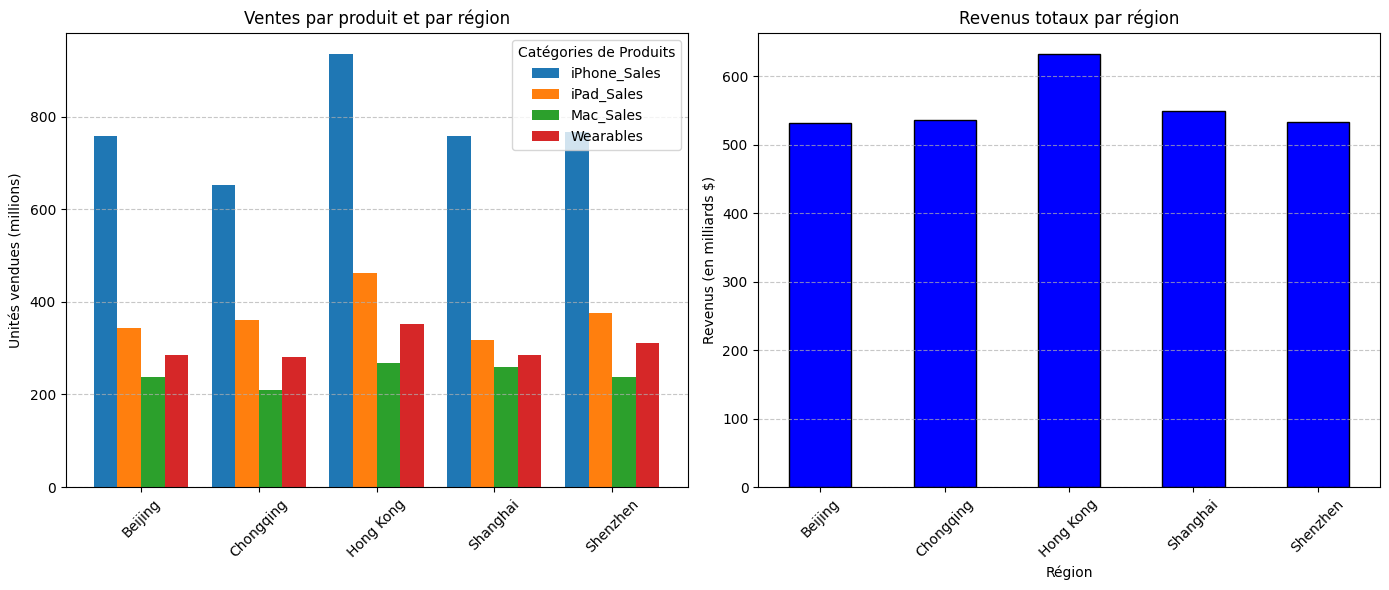

In [20]:
# visualisation de la vente des differents produits pour Chine

# Configuration de la figure
plt.figure(figsize=(14, 6))  # Taille globale de la figure (largeur, hauteur)
# Premier graphique : Barres pour les catégories par région
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
categories = ['iPhone_Sales', 'iPad_Sales', 'Mac_Sales', 'Wearables']
state = StateChina.index  # Récupération des régions (index après groupby)
x = range(len(state))  # Positions des groupes de barres
width = 0.2  # Largeur des barres

for i, category in enumerate(categories):
    plt.bar(
        [p + i * width for p in x],  # Position de chaque barre
        StateChina[category],  # Valeurs des barres
        width=width,  # Largeur
        label=category  # Nom pour la légende
    )

# Ajustements pour le premier graphique
plt.xticks([p + 1.5 * width for p in x], state, rotation=45)  # Centrage et rotation des labels
plt.ylabel("Unités vendues (millions)")
plt.title("Ventes par produit et par région")
plt.legend(title="Catégories de Produits")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ligne de la grille horizontale

# Deuxième graphique : Barres pour le revenu total par région
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, deuxième graphique
StateChina['Revenue_$'].plot(kind='bar', color='blue', edgecolor='black')
plt.title("Revenus totaux par région")
plt.xlabel("Région")
plt.ylabel("Revenus (en milliards $)")
plt.xticks(rotation=45)  # Rotation des labels de l'axe X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grille horizontale

# Ajustement global des marges
plt.tight_layout()

# Afficher la figure
plt.show()


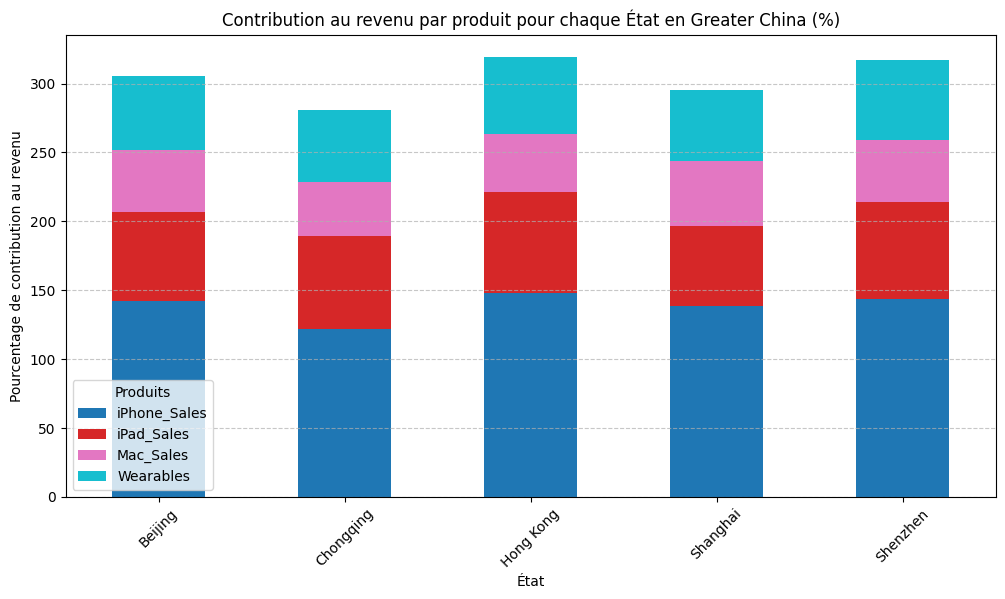

In [21]:
# Contribution au revenu par produit
StateChina_products = StateChina[['iPhone_Sales', 'iPad_Sales', 'Mac_Sales', 'Wearables']].mul([1, 1, 1, 1], axis=1)  # Remplace [1, 1, 1, 1] par les prix unitaires des produits si connus
StateChina_products['Revenue_$'] = StateChina['Revenue_$']

# Calculer la contribution au revenu
StateChina_products = StateChina_products.div(StateChina_products['Revenue_$'], axis=0) * 100

# Graphique
StateChina_products[['iPhone_Sales', 'iPad_Sales', 'Mac_Sales', 'Wearables']].plot(kind='bar', stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Contribution au revenu par produit pour chaque État en Greater China (%)")
plt.xlabel("État")
plt.ylabel("Pourcentage de contribution au revenu")
plt.xticks(rotation=45)
plt.legend(title="Produits")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [22]:
StateChina_products

,iPhone_Sales,iPad_Sales,Mac_Sales,Wearables,Revenue_$
State,,,,,
Beijing,142.335958,64.710637,44.779430,53.536455,100.0
Chongqing,121.769634,67.460303,39.139440,52.432221,100.0
Hong Kong,147.908980,73.354341,42.496556,55.870849,100.0
Shanghai,138.256747,58.023341,47.268417,51.936543,100.0
Shenzhen,143.783429,70.505771,44.517219,58.436708,100.0


In [23]:
state = data.groupby('State')[['iPhone_Sales','iPad_Sales','Mac_Sales','Wearables','Revenue_$']].sum()

In [24]:
state

,iPhone_Sales,iPad_Sales,Mac_Sales,Wearables,Revenue_$
State,,,,,
Australia,642.96,393.68,238.93,267.50,541.19
Beijing,757.27,344.28,238.24,284.83,532.03
Brazil,844.50,405.45,240.84,328.77,523.41
California,843.34,459.86,250.88,345.03,591.67
Canada,784.68,332.87,263.73,299.30,550.15
Chongqing,652.60,361.54,209.76,281.00,535.93
Florida,479.70,228.39,164.49,196.67,324.07
France,724.19,326.43,229.74,351.72,550.11
Germany,658.35,308.73,212.28,224.01,419.05


In [25]:
max_revenue_state = state['Revenue_$'].idxmax()  # État avec le revenu maximal
max_revenue_value = state['Revenue_$'].max()    # Valeur du revenu maximal
print(f"L'État avec le revenu le plus élevé est {max_revenue_state} avec {max_revenue_value} milliards $.")

L'État avec le revenu le plus élevé est Hong Kong avec 631.51 milliards $.


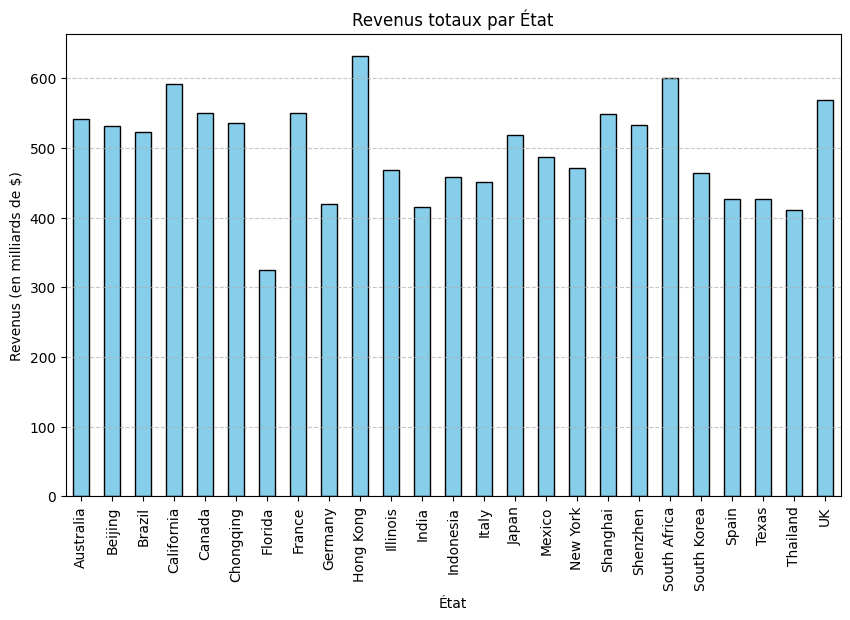

In [26]:
state['Revenue_$'].plot(
    kind='bar',
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black'
)
plt.title("Revenus totaux par État")
plt.xlabel("État")
plt.ylabel("Revenus (en milliards de $)")
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


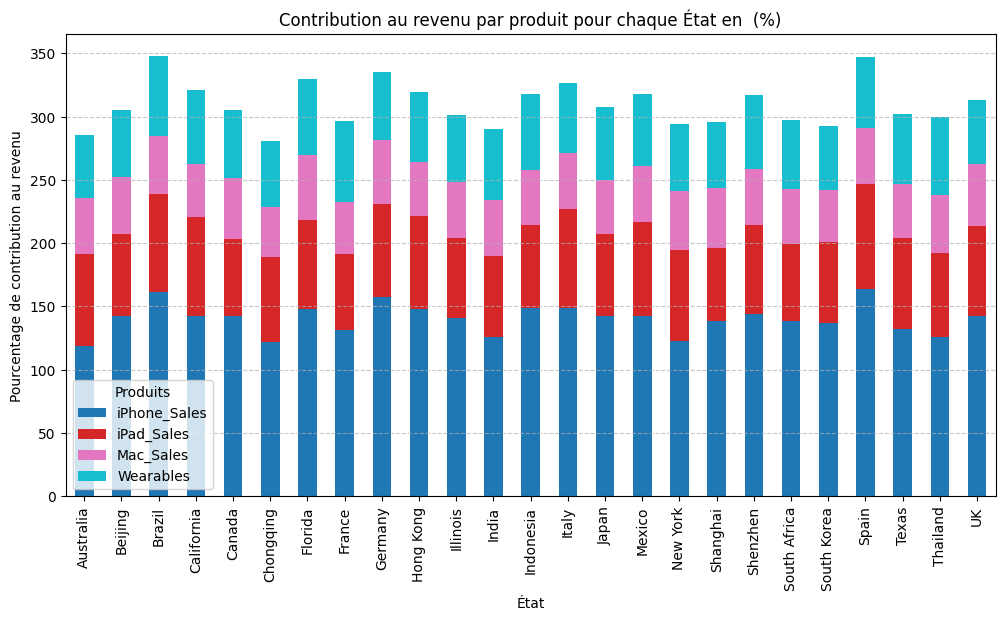

In [27]:
# Contribution au revenu par produit
State_products = state[['iPhone_Sales', 'iPad_Sales', 'Mac_Sales', 'Wearables']].mul([1, 1, 1, 1], axis=1)  # Remplace [1, 1, 1, 1] par les prix unitaires des produits si connus
State_products['Revenue_$'] = state['Revenue_$']

# Calculer la contribution au revenu
State_products = State_products.div(State_products['Revenue_$'], axis=0) * 100

# Graphique
State_products[['iPhone_Sales', 'iPad_Sales', 'Mac_Sales', 'Wearables']].plot(kind='bar', stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Contribution au revenu par produit pour chaque État en  (%)")
plt.xlabel("État")
plt.ylabel("Pourcentage de contribution au revenu")
#plt.xticks(rotation=45)
plt.legend(title="Produits")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analyse par région géographique :
- **Hong Kong** est l'Etat qui enregistre le plus de vente, avec un revenu total de **631,51 milliards $**. Elle est suivie par **South Africa**.La région avec le revenu le plus faible est l’État de **Floride**, avec un total de **324,07 milliards $**.
- Ces écarts significatifs peuvent être liés à plusieurs facteurs :
  - **Densité de population** : Hong Kong est une région fortement peuplée, ce qui pourrait expliquer un volume de ventes plus important.
  - **Niveau de développement** : Les régions plus développées sont plus susceptibles d’avoir des consommateurs capables d’acheter des produits premium comme ceux d’Apple.

### Analyse par produit :
- Parmi tous les produits Apple vendus :
  - **L’iPhone** domine largement le podium, représentant la plus grande part des revenus.
  - **L’iPad** suit en deuxième position.
  - Les **accessoires (Wearables)** se classent ensuite, avec une contribution notable.
  - Enfin, les **MacBooks** arrivent en dernière position, enregistrant des ventes inférieures aux autres catégories.
- Cette hiérarchie montre que les produits phares d’Apple, tels que l’iPhone, restent incontournables dans sa stratégie commerciale.

### Analyse globale :
- Les différences entre les régions pourraient également s’expliquer par le **ciblage marketing** et la **disponibilité des produits**. Certaines régions pourraient bénéficier d’une meilleure stratégie de distribution ou de promotions spécifiques.


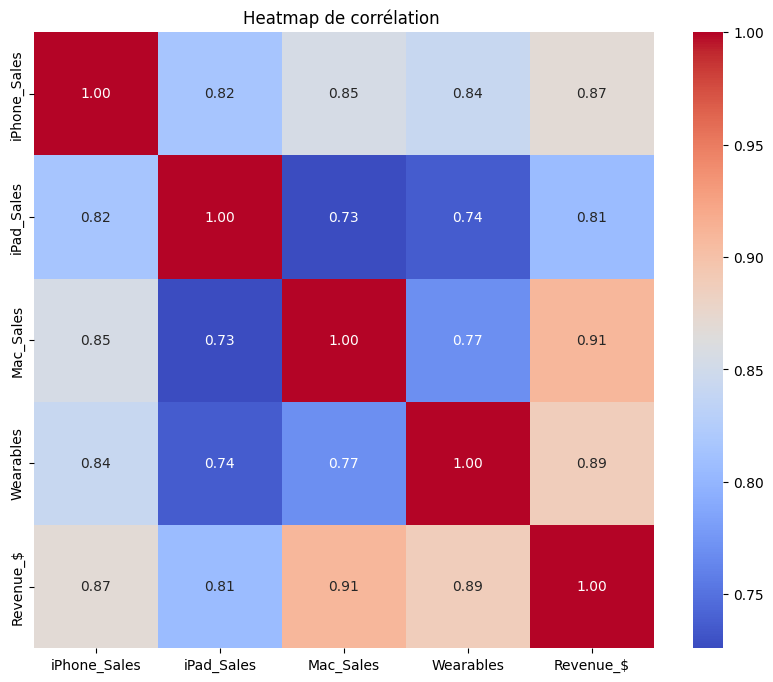

In [32]:
# voir à nouveaux les corrélations 
state_sale = state.select_dtypes(include=['number'])
matrice_corr = state_sale.corr()

# création du Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(matrice_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de corrélation ")
plt.show()

In [33]:
matrice_corr

,iPhone_Sales,iPad_Sales,Mac_Sales,Wearables,Revenue_$
iPhone_Sales,1.000000,0.815847,0.854965,0.842394,0.869356
iPad_Sales,0.815847,1.000000,0.725972,0.736273,0.805557
Mac_Sales,0.854965,0.725972,1.000000,0.769759,0.909828
Wearables,0.842394,0.736273,0.769759,1.000000,0.886808
Revenue_$,0.869356,0.805557,0.909828,0.886808,1.000000


### Interprétation du Heatmap
##### La heatmap montre une forte corrélation entre les différentes variables, avec des valeurs allant de 0.73 à 0.91. Cela met en évidence les liens étroits entre les ventes des différents produits et le revenu global (Revenue_$).
- **MacBooks (Mac_Sales)**  ont la plus forte corrélation avec le revenu total (0.91), ce qui indique que, bien que les MacBooks soient vendus en plus petite quantité, ils génèrent une part importante du chiffre d'affaires. Cela suggère qu'une stratégie marketing ciblée sur les MacBooks pourrait avoir un impact significatif sur les revenus globaux.

- **Accessoires (Wearables)**  arrivent en deuxième position avec une corrélation élevée de 0.89, confirmant leur contribution notable au chiffre d'affaires.

- **iPhones (iPhone_Sales)** , bien qu'étant le produit le plus vendu, présentent une corrélation légèrement inférieure (0.87) avec le revenu. Cela montre que, malgré leur volume élevé, leur contribution unitaire au revenu est inférieure à celle des MacBooks et des Wearables.

- **iPads (iPad_Sales)** , bien qu'étant le deuxième produit le plus vendu, ont la plus faible corrélation avec le revenu (0.80). Cela suggère que, comparé aux autres produits, les iPads génèrent moins de revenus par unité vendue.

### Conclusion et recommandations :
##### Ces observations mettent en évidence des opportunités pour maximiser les revenus :
- **Une politique marketing**  renforcée sur les MacBooks pourrait permettre d'augmenter les revenus globaux grâce à leur forte valeur ajoutée.
- Accentuer les efforts sur **les Wearables** , qui représentent également une forte opportunité de croissance.
- Réévaluer la stratégie autour des **iPads**, qui bien qu'importants en termes de ventes, ont un impact moindre sur le revenu total.